# Lấy thông tin và link anime

In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:

name = []
link = []
rank = []
score = []
type_anime = []
aired = []
members = []

url = "https://myanimelist.net/topanime.php?limit={}"
all_url = []

for i in range(0,6000,50):
    all_url.append(url.format(i))

x = 0
while all_url!=[] and x < 1000:
# Bước 1: Gửi yêu cầu đến trang web và thu thập nội dung HTML
    url = all_url.pop(0)
    if len(all_url)% 5 == 0:
        print(len(all_url))
    try:
        response = requests.get(url, timeout=10)

        # Bước 2: Phân tích cú pháp HTML với BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Bước 3: Tìm tất cả các thẻ <tr> có class="ranking-list"
        ranking_list_rows = soup.find_all("tr", class_="ranking-list")

        # Bước 4: Xử lý dữ liệu từ các thẻ tr
        for count, row in  enumerate(ranking_list_rows):
            a_name = row.find_all("div",class_="di-ib clearfix")[0].find("a")
            name.append(a_name.text)
            link.append(a_name['href'])
            rank.append(row.find_all("span")[0].text)
            score.append(row.find_all("span")[1].text)
            info = row.find_all("div",class_="information di-ib mt4")[0].text.strip().split("\n        ")
            type_anime.append(info[0])
            aired.append(info[1])
            members.append(info[2])

    except:
        all_url.append(url)

115
115
115
110


In [ ]:
url = "https://myanimelist.net/topanime.php?limit={}"
all_url = []
for i in range(6000,10000,50):
    all_url.append(url.format(i))

x = 0
while all_url!=[] and x < 1000:
# Bước 1: Gửi yêu cầu đến trang web và thu thập nội dung HTML
    url = all_url.pop(0)
    if len(all_url)% 5 == 0:
        print(len(all_url))
    try:
        response = requests.get(url, timeout=10)

        # Bước 2: Phân tích cú pháp HTML với BeautifulSoup
        soup = BeautifulSoup(response.content, "html.parser")

        # Bước 3: Tìm tất cả các thẻ <tr> có class="ranking-list"
        ranking_list_rows = soup.find_all("tr", class_="ranking-list")

        # Bước 4: Xử lý dữ liệu từ các thẻ tr
        for count, row in  enumerate(ranking_list_rows):
            a_name = row.find_all("div",class_="di-ib clearfix")[0].find("a")
            name.append(a_name.text)
            link.append(a_name['href'])
            rank.append(row.find_all("span")[0].text)
            score.append(row.find_all("span")[1].text)
            info = row.find_all("div",class_="information di-ib mt4")[0].text.strip().split("\n        ")
            type_anime.append(info[0])
            aired.append(info[1])
            members.append(info[2])

    except:
        all_url.append(url)

In [ ]:
data = {
    'Name' : name,
    'Rank' : rank,
    'Score' : score,
    'Type' : type_anime,
    'Aired' : aired,
    'Members' : members,
    'Link' : link
}

In [ ]:
import pandas as pd
df = pd.DataFrame(data)
df.to_csv('anime_link.csv',index=False)
df

# Lấy thông tin link nhân vật trong 1 anime

## Tiền xử lý

In [1]:
def extract_number(text):
    number = re.sub(r'\D', '', text)
    try: return int(number)
    except: return 0
def extract_type(text):
    result = re.sub(r'\s*\(.*?\)', '', text)
    return result
def extract_year(text):
    result = re.sub(r'\D', '', text)[:4]
    try: return int(result)
    except: return 0
    

In [4]:
anime_df = pd.read_csv('anime_link.csv')
anime_df['Members'] = anime_df['Members'].apply(extract_number)
anime_df['Episodes'] = anime_df['Type'].apply(extract_number)
anime_df['Type'] = anime_df['Type'].apply(extract_type)

In [5]:
x = np.where(anime_df['Aired'].apply(extract_year).values == 0)
x

(array([7798, 8289, 8764]),)

In [6]:
anime_df['Name'].values[x]

array(['Tottoko Hamtarou no Tottoko Taisetsu!! Koutsuu Rule',
       'Captain Tsubasa no Shouka Sakusen',
       'Mahou no Princess Minky Momo: Yume wo Dakishimete Specials'],
      dtype=object)

In [7]:
anime_df

,Name,Rank,Score,Type,Aired,Members,Link,Episodes
0,Sousou no Frieren,1,9.33,TV,Sep 2023 - Mar 2024,910835,https://myanimelist.net/anime/52991/Sousou_no_...,28
1,Bleach: Sennen Kessen-hen - Soukoku-tan,2,9.09,TV,Oct 2024 -,115713,https://myanimelist.net/anime/56784/Bleach__Se...,0
2,Fullmetal Alchemist: Brotherhood,3,9.09,TV,Apr 2009 - Jul 2010,3422487,https://myanimelist.net/anime/5114/Fullmetal_A...,64
3,Steins;Gate,4,9.07,TV,Apr 2011 - Sep 2011,2622375,https://myanimelist.net/anime/9253/Steins_Gate,24
4,Gintama°,5,9.06,TV,Apr 2015 - Mar 2016,646103,https://myanimelist.net/anime/28977/Gintama°,51
...,...,...,...,...,...,...,...,...
9995,Cestvs: The Roman Fighter,9996,5.95,TV,Apr 2021 - Jun 2021,21084,https://myanimelist.net/anime/43763/Cestvs__Th...,11
9996,Chikkun Takkun,9997,5.95,TV,Apr 1984 - Sep 1984,1038,https://myanimelist.net/anime/16303/Chikkun_Ta...,23
9997,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...,9998,5.95,TV,Jul 2014 - Sep 2014,13255,https://myanimelist.net/anime/23551/Choborauny...,12
9998,Choujin Locke: Shinsekai Sentai,9999,5.95,OVA,Aug 1991 - Oct 1991,1683,https://myanimelist.net/anime/4534/Choujin_Loc...,2


## Loại bớt dòng 

### Loại dòng có aired = 0

In [8]:
anime_df['Aired'] = anime_df['Aired'].apply(extract_year)
anime_df = anime_df[anime_df['Aired'] != 0]
anime_df.describe()

,Rank,Score,Aired,Members,Episodes
count,9997.000000,9997.000000,9997.000000,9.997000e+03,9997.000000
mean,4999.514454,6.928487,2009.096029,9.959339e+04,15.456437
std,2886.759991,0.637328,12.143054,2.587984e+05,47.654494
min,1.000000,5.950000,1956.000000,2.130000e+02,0.000000
25%,2500.000000,6.410000,2003.000000,3.579000e+03,1.000000
50%,4999.000000,6.850000,2012.000000,1.528900e+04,10.000000
75%,7498.000000,7.350000,2018.000000,7.486900e+04,13.000000
max,10000.000000,9.330000,2024.000000,4.042007e+06,3057.000000


### Chỉ lấy TV, Moive, ONA

In [9]:
anime_df['Type'].apply(extract_type).value_counts()

Type
TV            4258
Movie         1737
OVA           1264
ONA           1249
Special       1072
TV Special     416
Unknown          1
Name: count, dtype: int64

In [10]:
types_to_keep = ['TV', 'ONA', 'Movie']
anime_df = anime_df[anime_df['Type'].isin(types_to_keep)]

### Kiểm tra ONA dư ( episode < 5)

In [11]:
(anime_df['Episodes'][anime_df['Type'] == 'TV'] <5).sum()

46

In [12]:
(anime_df['Episodes'][anime_df['Type'] == 'ONA'] <5)

10       True
54      False
66      False
68      False
83      False
        ...  
9982     True
9989     True
9990    False
9993    False
9999     True
Name: Episodes, Length: 1249, dtype: bool

In [13]:
anime_df.describe()

,Rank,Score,Aired,Members,Episodes
count,7244.000000,7244.000000,7244.000000,7.244000e+03,7244.000000
mean,4756.321784,6.985258,2009.782303,1.257538e+05,20.273330
std,2910.436385,0.655907,12.837947,2.975949e+05,55.168036
min,1.000000,5.950000,1956.000000,2.130000e+02,0.000000
25%,2189.750000,6.450000,2004.000000,3.461750e+03,1.000000
50%,4620.000000,6.930000,2014.000000,2.044150e+04,12.000000
75%,7253.250000,7.430000,2019.000000,1.093925e+05,24.000000
max,10000.000000,9.330000,2024.000000,4.042007e+06,3057.000000


### Loại bớt phim ít người quan tâm (member <3000, rank > 7000)

In [14]:
less_3000_mem= np.where(anime_df['Members'].values < 3000)[0]
rank = anime_df['Rank'].values 

(array([ 13.,  32.,  30.,  63., 114., 143., 194., 278., 368., 421.]),
 array([  230.,  1207.,  2184.,  3161.,  4138.,  5115.,  6092.,  7069.,
         8046.,  9023., 10000.]),
 <BarContainer object of 10 artists>)

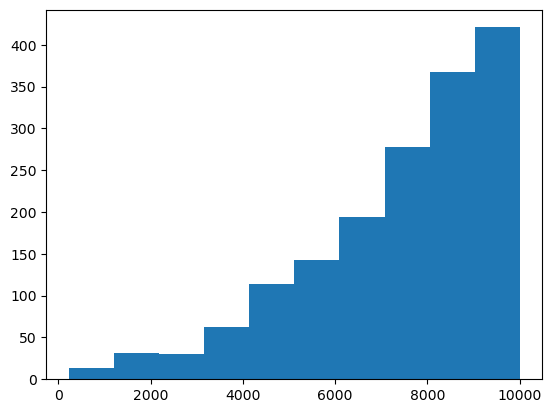

In [15]:
plt.hist(rank[less_3000_mem])

In [16]:
less_known = np.where(rank[less_3000_mem] > 7000)[0]
len(less_known)

1088

In [17]:
anime_df = anime_df[~anime_df.index.isin(less_known)]
anime_df

,Name,Rank,Score,Type,Aired,Members,Link,Episodes
0,Sousou no Frieren,1,9.33,TV,2023,910835,https://myanimelist.net/anime/52991/Sousou_no_...,28
1,Bleach: Sennen Kessen-hen - Soukoku-tan,2,9.09,TV,2024,115713,https://myanimelist.net/anime/56784/Bleach__Se...,0
2,Fullmetal Alchemist: Brotherhood,3,9.09,TV,2009,3422487,https://myanimelist.net/anime/5114/Fullmetal_A...,64
3,Steins;Gate,4,9.07,TV,2011,2622375,https://myanimelist.net/anime/9253/Steins_Gate,24
4,Gintama°,5,9.06,TV,2015,646103,https://myanimelist.net/anime/28977/Gintama°,51
...,...,...,...,...,...,...,...,...
9993,Bloomy*Cafe,9994,5.95,ONA,2021,501,https://myanimelist.net/anime/51348/BloomyCafe,25
9995,Cestvs: The Roman Fighter,9996,5.95,TV,2021,21084,https://myanimelist.net/anime/43763/Cestvs__Th...,11
9996,Chikkun Takkun,9997,5.95,TV,1984,1038,https://myanimelist.net/anime/16303/Chikkun_Ta...,23
9997,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...,9998,5.95,TV,2014,13255,https://myanimelist.net/anime/23551/Choborauny...,12


## Phân tích favorite

In [20]:
for i, c in enumerate(favorites):
    favorites[i] = extract_number(c)

In [21]:
f = np.array(favorites)
len(set(anime_name))

0

In [22]:
len(np.where(f>30)[0])

0

In [23]:
import time

## Bắt đầu thu thập

In [24]:
anime_name = []
char_name = []
role = []
favorites = []
link = []
error_index = []
all_index = list(anime_df.index)
count = 0


In [30]:
b_anime_name = anime_name
b_char_name = char_name
b_role = role
b_favorites = favorites
b_link = link
b_error_index = error_index


In [45]:
len(set(anime_name))

4872

In [52]:
for index in all_index[5253:]:
    count += 1
    url = anime_df['Link'][index] + '/characters'
    try:
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")
        tb_character = soup.find_all("table", class_="js-anime-character-table")
        i = 0
        for character in tb_character:
            i += 1
            info = character.find_all('div',class_="spaceit_pad")
            a_name = info[0].find('a')
            char_name.append(a_name.text)
            link.append(a_name['href'])
            role.append(info[1].text.strip())
            favorites.append(info[2].text.strip())
            anime_name.append(anime_df['Name'][index])
        if i == 0:
            error_index.append(index)
            print('error: ',index)
            time.sleep(30)
        if count % 10 == 0:
            print(count)
    except:
            print('error 2: ',index)
            time.sleep(300)
    

5260
error:  8316
error:  8326
5270
error:  8344
5280
5290
5300
error:  8376
error:  8384
error:  8392
5310
error:  8396
error:  8400
error:  8403
5320
error:  8417
5330
error:  8429
error:  8431
error:  8432
error:  8436
5340
error:  8443
error:  8456
5350
5360
error:  8470
error:  8471
error:  8475
error:  8479
5370
error:  8486
error:  8490
error:  8495
error:  8496
error:  8499
5380
error:  8501
error:  8511
5390
error:  8531
5400
error:  8535
error:  8537
error:  8541
error:  8545
5410
5420
error:  8565
error:  8566
error:  8568
error:  8574
5430
error:  8587
5440
5450
error:  8613
error:  8628
5460
error:  8632
5470
5480
error:  8671
error:  8673
5490
error:  8684
5500
error:  8694
5510
error:  8711
5520
error:  8727
error:  8730
5530
error:  8746
5540
error:  8759
error:  8769
5550
error:  8781
error:  8786
5560
error:  8795
error:  8797
5570
error:  8805
error:  8809
error:  8813
error:  8814
5580
error:  8827
5590
5600
error:  8850
error:  8853
error:  8855
error:  8856
5610
e


KeyboardInterrupt



In [63]:
f = open("error_index.txt", "w")
for item in error_index:
    f.write(str(item) + '\n')
f.close()

In [57]:
error_index

[128,
 129,
 130,
 131,
 278,
 279,
 280,
 420,
 421,
 422,
 423,
 1669,
 1670,
 1671,
 1672,
 1763,
 1835,
 1837,
 1838,
 1839,
 1920,
 2004,
 2005,
 2006,
 2007,
 2021,
 2176,
 2177,
 2179,
 2180,
 2181,
 2296,
 2334,
 2337,
 2422,
 2436,
 2493,
 2494,
 2512,
 2513,
 2514,
 2555,
 2598,
 2696,
 2739,
 2749,
 2837,
 2857,
 3001,
 3002,
 3012,
 3059,
 3172,
 3173,
 3219,
 3234,
 3282,
 3315,
 3461,
 3504,
 3505,
 3532,
 3557,
 3623,
 3652,
 3655,
 3656,
 3705,
 3734,
 3755,
 3771,
 3808,
 3815,
 3835,
 3836,
 3875,
 3957,
 3958,
 4005,
 4051,
 4101,
 4124,
 4225,
 4259,
 4267,
 4276,
 4315,
 4329,
 4348,
 4370,
 4381,
 4386,
 4447,
 4466,
 4508,
 4512,
 4557,
 4590,
 4629,
 4630,
 4647,
 4659,
 4721,
 4769,
 4779,
 4784,
 4796,
 4800,
 4810,
 4855,
 4875,
 4921,
 4952,
 4972,
 5011,
 5035,
 5036,
 5038,
 5039,
 5044,
 5056,
 5059,
 5110,
 5128,
 5141,
 5163,
 5219,
 5225,
 5234,
 5289,
 5295,
 5321,
 5375,
 5386,
 5387,
 5398,
 5407,
 5408,
 5414,
 5475,
 5538,
 5542,
 5578,
 5603,
 56

In [55]:
char_dict = {
    'Anime' :  anime_name,
    'Character': char_name,
    'Role' : role,
    'Favorites' : favorites,
    'Link' : link
}
char_df = pd.DataFrame(char_dict)
char_df

,Anime,Character,Role,Favorites,Link
0,Sousou no Frieren,Fern,Main,"3,458 Favorites",https://myanimelist.net/character/188176/Fern
1,Sousou no Frieren,Frieren,Main,"19,949 Favorites",https://myanimelist.net/character/184947/Frieren
2,Sousou no Frieren,Stark,Main,"1,833 Favorites",https://myanimelist.net/character/188177/Stark
3,Sousou no Frieren,Aura,Supporting,70 Favorites,https://myanimelist.net/character/206722/Aura
4,Sousou no Frieren,Blei,Supporting,1 Favorites,https://myanimelist.net/character/215341/Blei
...,...,...,...,...,...
119260,Hajime Ningen Gyatoruz,Father,Supporting,0 Favorites,https://myanimelist.net/character/143836/Father
119261,Hajime Ningen Gyatoruz,Grim Reaper,Supporting,1 Favorites,https://myanimelist.net/character/143838/Grim_...
119262,Hajime Ningen Gyatoruz,Mother,Supporting,0 Favorites,https://myanimelist.net/character/143835/Mother
119263,Hajime Ningen Gyatoruz,Piko-chan,Supporting,0 Favorites,https://myanimelist.net/character/143837/Piko-...


In [56]:
char_df.to_csv('character_urls3.csv',index = False)

# Lấy ảnh của 1 nhân vật

In [ ]:
url = 'https://myanimelist.net/character/188176/Fern'
url +='/pics'
for i in range(1):
    response = requests.get(url, timeout=10)
    soup = BeautifulSoup(response.content, "html.parser")
    urls = soup.find_all('a',class_='js-picture-gallery')
    for url in urls:
        link.append(url['href'])
        print(url['href'])

In [65]:
char_pic_df = pd.read_csv('character_pic_url.csv')
char_pic_df['char_pic_url'][0]

'https://cdn.myanimelist.net/images/characters/13/75376.jpg'

In [18]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time

In [19]:
anime = pd.read_csv('anime_link.csv')
anime_url = anime['Link']

In [22]:
anime_url[0]

'https://myanimelist.net/anime/52991/Sousou_no_Frieren'

In [23]:
all_reviews_count = 200

In [24]:
url = 'https://myanimelist.net/anime/52991/Sousou_no_Frieren'
page = 1
count = all_reviews_count
review_text = []
rating_value = []
reactions = []
while (count - 1)/20 >= 0 and page <=5:
    review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=off&p=' + str(page)
    
    page += 1 
    count -= 20
    
    response = requests.get(review_url, timeout=10)
    if response.status_code == 200:
        html_content = response.text
        soup = BeautifulSoup(response.content, "html.parser")

        reviews = soup.find_all("div", class_="review-element js-review-element")
        print(len(reviews))
        
        for review in reviews:
            review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))

            rating = review.find("div", class_="rating")
            rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

            reactions_data = review["data-reactions"]  
            reactions_data = json.loads(reactions_data)
            reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
            reactions.append(reactions_data)



20
20
20
20
20


In [ ]:
data = {
    "review text": review_text,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions]
}

In [2]:
data0_df = pd.read_csv('anime_synopsis.csv')

In [3]:
all_reviews_count = data0_df['All reviews count']


In [5]:
all_reviews_count[500]

16